In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# from sklearn import datasets
# ds1 = datasets.fetch_california_housing()

df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df1_scaled = scaler.fit_transform(df)
df1_scaled = pd.DataFrame(df1_scaled, columns = df.columns)

print(df1_scaled)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       2.619365 -0.671520           -1.079671     1.361695        1.764204   
1       2.539569 -0.573264           -0.761872     2.296608        3.230441   
2       2.494683 -0.905463           -0.920772    -0.882462       -0.866956   
3       2.489696 -0.928857           -1.159121    -0.524186       -0.480230   
4       2.489696 -0.961609           -0.682422    -0.545747       -0.506328   
...          ...       ...                 ...          ...             ...   
16995  -2.342963  2.318265            1.859971    -0.195728       -0.344995   
16996  -2.347950  2.369733            0.588774    -0.135174       -0.027073   
16997  -2.362912  2.907801           -0.920772     0.015292       -0.019955   
16998  -2.362912  2.889085           -0.761872     0.012999        0.029868   
16999  -2.387848  2.299550            1.859971    -0.377848       -0.568015   

       population  households  median_income  media

In [14]:

df1_scaled = np.clip(df1_scaled,-100,100)
print(df1_scaled)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0            1.0 -0.671520           -1.000000     1.000000        1.000000   
1            1.0 -0.573264           -0.761872     1.000000        1.000000   
2            1.0 -0.905463           -0.920772    -0.882462       -0.866956   
3            1.0 -0.928857           -1.000000    -0.524186       -0.480230   
4            1.0 -0.961609           -0.682422    -0.545747       -0.506328   
...          ...       ...                 ...          ...             ...   
16995       -1.0  1.000000            1.000000    -0.195728       -0.344995   
16996       -1.0  1.000000            0.588774    -0.135174       -0.027073   
16997       -1.0  1.000000           -0.920772     0.015292       -0.019955   
16998       -1.0  1.000000           -0.761872     0.012999        0.029868   
16999       -1.0  1.000000            1.000000    -0.377848       -0.568015   

       population  households  median_income  media

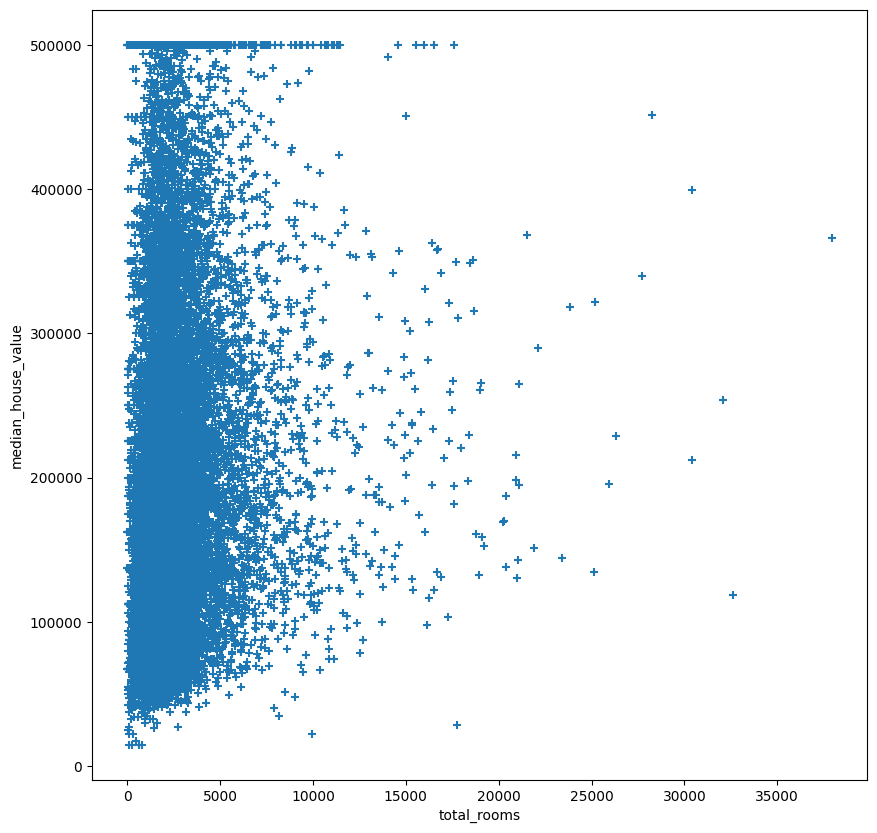

In [16]:
plt.figure(figsize = (10,10))
plt.scatter(df['total_rooms'], df['median_house_value'], marker = "+")
plt.xlabel('total_rooms')
plt.ylabel('median_house_value')
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression # import the LinearRegression class from the sklearn.linear_model module

regacc = LinearRegression() # create an instance of the LinearRegression class
regacc.fit(df[['total_rooms']], df.median_house_value)

LinearRegression()

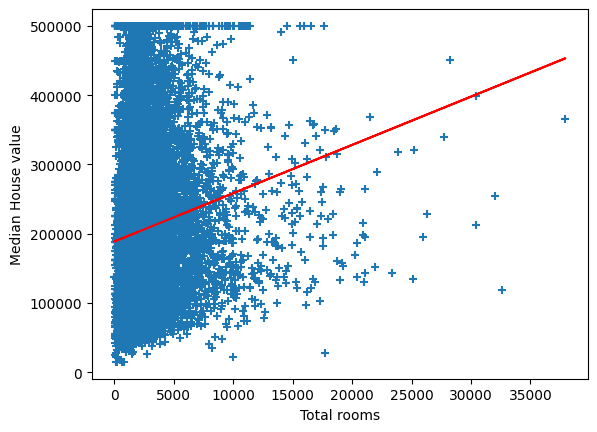

In [24]:
plt.xlabel("Total rooms")
plt.ylabel("Median House value")

plt.scatter(df.total_rooms, df.median_house_value, marker="+")
plt.plot(df.total_rooms, regacc.predict(df[['total_rooms']]),color='red')

In [25]:
regacc.predict([[6000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([230692.49638373])

In [26]:
test=pd.read_csv('/content/sample_data/california_housing_test.csv')
test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [27]:
pre=regacc.predict(test[['total_rooms']])
test['prediction']=pre
test.to_csv('cal.csv')


In [28]:
check=pd.read_csv("/content/cal.csv")
check.head(10)

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,prediction
0,0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,215952.253960
1,1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,199399.972279
2,2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,213889.316959
3,3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,189343.154399
4,4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,197525.208585
5,5,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,67000.0,195971.036453
6,6,-121.43,38.63,43.0,1009.0,225.0,604.0,218.0,1.6641,67000.0,195908.312017
7,7,-120.65,35.48,19.0,2310.0,471.0,1341.0,441.0,3.2250,166900.0,204975.477687
8,8,-122.84,38.40,15.0,3080.0,617.0,1446.0,599.0,3.6696,194400.0,210341.901643
9,9,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,164200.0,205616.660809


# **MULTUVARIABLE REGRESSION**

In [29]:
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [30]:
a1=df.drop(['median_house_value'], axis='columns')
a1


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


In [31]:
y1=df['median_house_value']

In [37]:
from sklearn.linear_model import LinearRegression

regMulti=LinearRegression()

regMulti.fit(a1,y1)

LinearRegression()

In [38]:

testacc=pd.read_csv('/content/sample_data/california_housing_test.csv')
testacc



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [39]:
d=testacc.drop(['median_house_value'], axis='columns')
d

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375
...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708


In [46]:
pred=regMulti.predict(d[['longitude', 'latitude','housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income']])
# testacc['predicted']=pred
# testacc.to_csv('predict.csv')
pred

array([352812.31112454, 212717.70074518, 272344.69951888, ...,
        88220.58643733, 146374.67481457, 456779.61107787])

In [50]:

d['predicted']=pred
d.to_csv('predict.csv')

In [51]:
regMulti.coef_


array([-4.31396373e+04, -4.29256731e+04,  1.15069493e+03, -8.37825121e+00,
        1.17648543e+02, -3.84887721e+01,  4.54360026e+01,  4.05070684e+04])

In [52]:
predic=pd.read_csv('/content/predict.csv')
predic


,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,predicted
0,0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,352812.311125
1,1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,212717.700745
2,2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,272344.699519
3,3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,314244.319350
4,4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,119644.222387
...,...,...,...,...,...,...,...,...,...,...
2995,2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,189380.856561
2996,2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,178045.664529
2997,2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,88220.586437
2998,2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,146374.674815


In [54]:
y=predic['predicted']
y



,predicted
0,352812.311125
1,212717.700745
2,272344.699519
3,314244.319350
4,119644.222387
...,...
2995,189380.856561
2996,178045.664529
2997,88220.586437
2998,146374.674815


In [56]:
z=testacc['median_house_value']
z

,median_house_value
0,344700.0
1,176500.0
2,270500.0
3,330000.0
4,81700.0
...,...
2995,225000.0
2996,237200.0
2997,62000.0
2998,162500.0


In [57]:
print("Train", regMulti.score(a1,y1)*100)

Train 64.13378529502687


In [58]:
model=regMulti.fit(d,z)

In [59]:
print("Test", regMulti.score(d,z)*100)


Test 62.03469235366268
